In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
def get_rmse(line, actual):
    error = [x-y for x, y in zip(line, actual)]
    err_sq =[value**2 for value in error]
    rmse = np.sqrt(np.mean(err_sq))
    return(rmse)
    

In [3]:
df = pd.read_csv('Housing_dataset_train.csv')

In [4]:
df

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718


In [5]:
df.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [7]:
df.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [8]:
df.columns


Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

<Axes: >

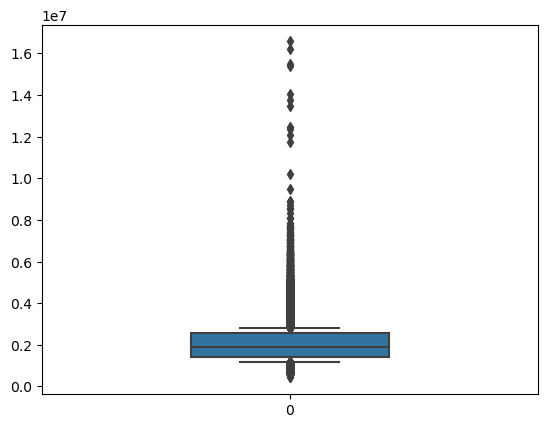

In [9]:
sns.boxplot(df['price'], whis=0.2, width=0.4)

<Axes: xlabel='count', ylabel='loc'>

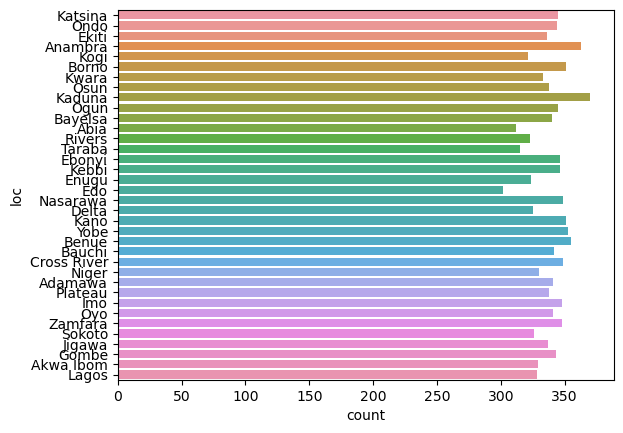

In [10]:
sns.countplot(y='loc', data=df)

In [11]:
IQR= df['price'].quantile(.75)-df['price'].quantile(.25)
max_price = df['price'].quantile(.75)+(1.5*IQR)
max_price

4375764.45875

In [12]:
df_fliers = df.loc[df['price']>max_price]

In [13]:
df_fliers.describe()

,ID,bedroom,bathroom,parking_space,price
count,568.000000,493.000000,489.000000,495.000000,5.680000e+02
mean,5209.612676,6.320487,3.617587,3.264646,5.487969e+06
std,3743.516673,2.310881,2.126862,1.638561,1.505151e+06
min,16.000000,1.000000,1.000000,1.000000,4.375863e+06
25%,2087.250000,5.000000,2.000000,2.000000,4.686034e+06
50%,4244.000000,7.000000,3.000000,3.000000,5.037924e+06
75%,8330.000000,8.000000,6.000000,5.000000,5.789034e+06
max,12964.000000,9.000000,7.000000,6.000000,1.656849e+07


<Axes: xlabel='count', ylabel='loc'>

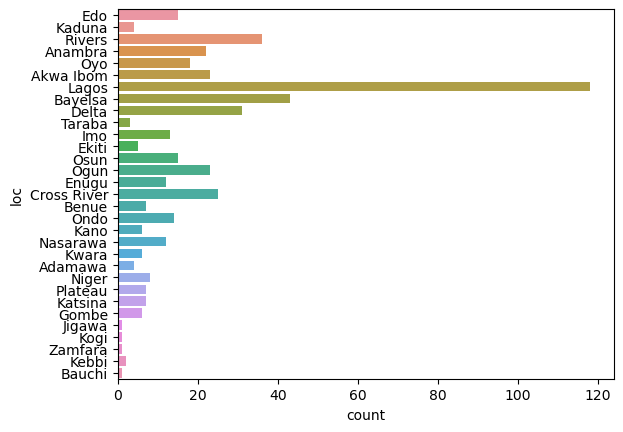

In [14]:
sns.countplot(y= df_fliers['loc'])

In [15]:
# If your home exceeds 4.3 million, it's most likely in Lagos.

<Axes: xlabel='count', ylabel='title'>

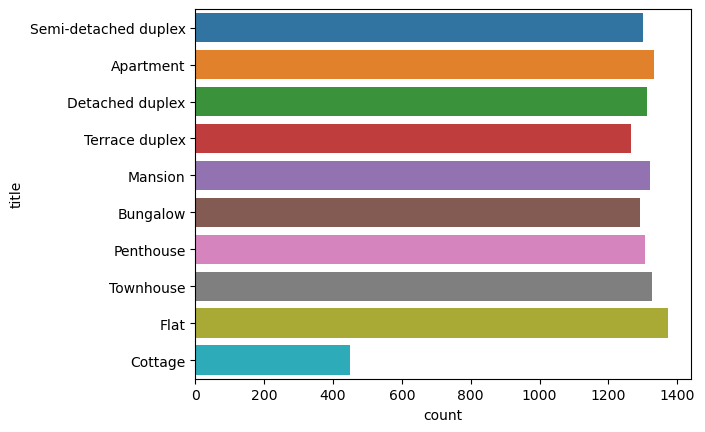

In [16]:
sns.countplot(y=df['title'])

<Axes: xlabel='count', ylabel='title'>

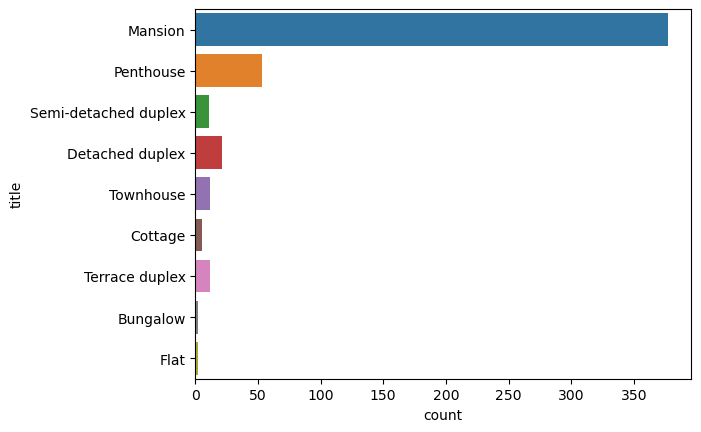

In [17]:
sns.countplot(y = df_fliers['title'])

In [18]:
# Mansions Dominate the outliers

In [19]:
df_norm = df.loc[df['price'] <= max_price]

<Axes: xlabel='count', ylabel='loc'>

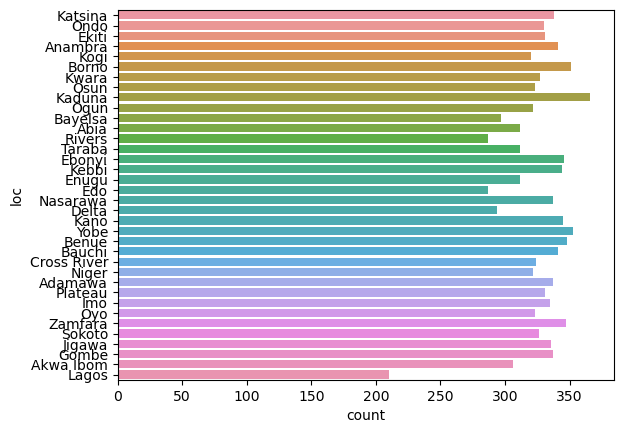

In [20]:
sns.countplot(y = df_norm['loc'])

In [21]:
#Half of all Lagos homes are outliers

In [22]:
def info(data):
    fig, ax = plt.subplots(1, 2)
    x = sns.countplot(x='bedroom', data=data, ax=ax[0])
    y = sns.countplot(x='bathroom', data=data, ax=ax[1])
    return x,y

(<Axes: xlabel='bedroom', ylabel='count'>,
 <Axes: xlabel='bathroom', ylabel='count'>)

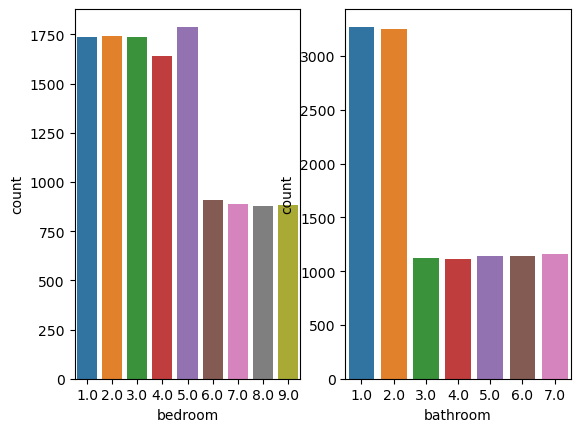

In [23]:
info(df) # Most homes generally have btw 1-5 bedrooms and around 2 bathrooms

(<Axes: xlabel='bedroom', ylabel='count'>,
 <Axes: xlabel='bathroom', ylabel='count'>)

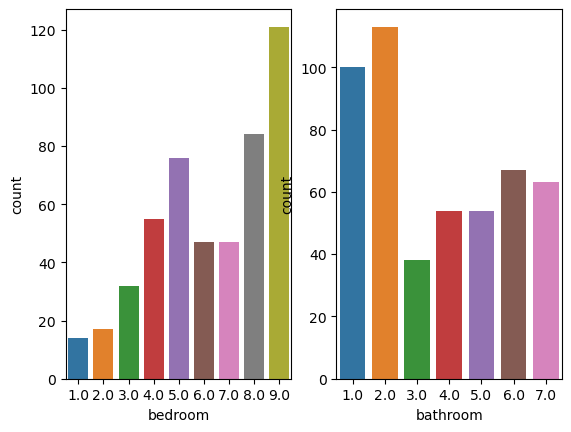

In [24]:
info(df_fliers) # Homes in this category have > 5 bedroom and still median out at around 2 bathrooms

(<Axes: xlabel='bedroom', ylabel='count'>,
 <Axes: xlabel='bathroom', ylabel='count'>)

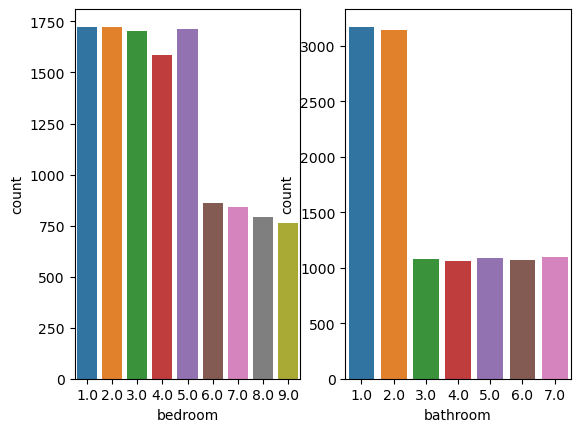

In [25]:
info(df_norm)

In [26]:
df_fliers.isnull().sum()

ID                0
loc              79
title            73
bedroom          75
bathroom         79
parking_space    73
price             0
dtype: int64

In [27]:
def averages(data):
    averages = {'mean_bedroom':data['bedroom'].mean(),
                'median_bedroom':data['bedroom'].median(),
                'mean_bathroom':data['bathroom'].mean(),
                'median_bathroom':data['bathroom'].median(),
                'mean_parking':data['parking_space'].mean(),
                'median_parking':data['parking_space'].median(),
               }
    return averages
    

In [28]:
averages(df_fliers)

{'mean_bedroom': 6.320486815415822,
 'median_bedroom': 7.0,
 'mean_bathroom': 3.61758691206544,
 'median_bathroom': 3.0,
 'mean_parking': 3.264646464646465,
 'median_parking': 3.0}

In [29]:
averages(df)

{'mean_bedroom': 4.308171461355626,
 'median_bedroom': 4.0,
 'mean_bathroom': 3.1342353423534237,
 'median_bathroom': 2.0,
 'mean_parking': 3.169825252276643,
 'median_parking': 3.0}

In [30]:
averages(df_norm)

{'mean_bedroom': 4.223436966176973,
 'median_bedroom': 4.0,
 'mean_bathroom': 3.1140440799589952,
 'median_bathroom': 2.0,
 'mean_parking': 3.1658115272789464,
 'median_parking': 3.0}

In [31]:
df_fliers['parking_space'],df_fliers['bedroom'], df_fliers['bathroom'] = df_fliers['parking_space'].fillna(3),df_fliers['bedroom'].fillna(6),df_fliers['bathroom'].fillna(3)

C:\Users\kikio\AppData\Local\Temp\ipykernel_7516\1029897569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fliers['parking_space'],df_fliers['bedroom'], df_fliers['bathroom'] = df_fliers['parking_space'].fillna(3),df_fliers['bedroom'].fillna(6),df_fliers['bathroom'].fillna(3)


In [32]:
df1 = df

In [33]:
df=df.update(df_fliers)
df = df1
df


,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583.0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748.0,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261.0,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224.0,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300.0,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175.0,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704.0,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190.0,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256.0,Delta,Flat,NaN,6.0,1.0,3348918.718


In [34]:
df_norms = df_norm.loc[(df_norm['bedroom']>5) & (df_norm['bathroom']>2)]

(<Axes: xlabel='bedroom', ylabel='count'>,
 <Axes: xlabel='bathroom', ylabel='count'>)

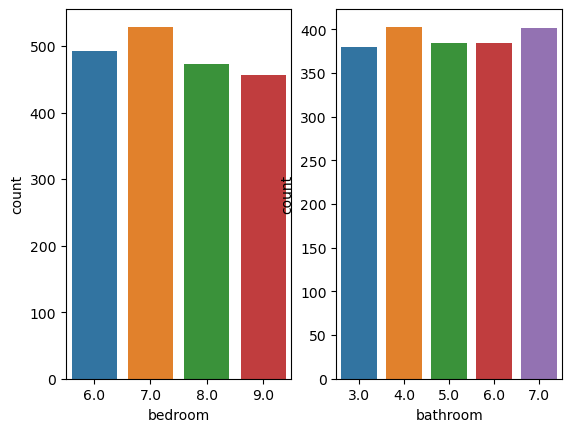

In [35]:
info(df_norms)

In [36]:
averages(df_norms)

{'mean_bedroom': 7.457991803278689,
 'median_bedroom': 7.0,
 'mean_bathroom': 5.011782786885246,
 'median_bathroom': 5.0,
 'mean_parking': 3.502398081534772,
 'median_parking': 4.0}

<Axes: xlabel='count', ylabel='title'>

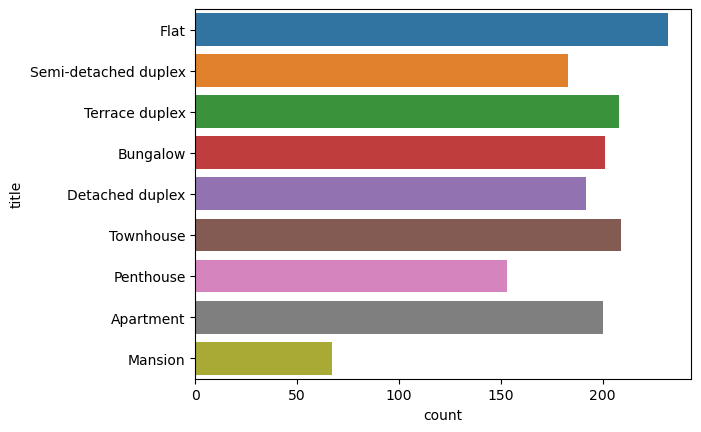

In [37]:
sns.countplot(y='title', data=df_norms)

In [38]:
df_norms['parking_space'],df_norms['bedroom'], df_norms['bathroom'] = df_norms['parking_space'].fillna(4),df_norms['bedroom'].fillna(7),df_norms['bathroom'].fillna(5)

C:\Users\kikio\AppData\Local\Temp\ipykernel_7516\1133303255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norms['parking_space'],df_norms['bedroom'], df_norms['bathroom'] = df_norms['parking_space'].fillna(4),df_norms['bedroom'].fillna(7),df_norms['bathroom'].fillna(5)


In [39]:
df=df.update(df_norms)
df = df1
df


,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583.0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748.0,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261.0,Ekiti,NaN,7.0,5.0,4.0,3364799.814
3,2224.0,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300.0,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175.0,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704.0,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190.0,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256.0,Delta,Flat,NaN,6.0,1.0,3348918.718


In [40]:
df['title'].unique()

array(['Semi-detached duplex', 'Apartment', nan, 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Flat', 'Cottage'], dtype=object)

In [41]:
#Average of title prices.

In [42]:
types = [df.loc[df['title']==i] for i in df['title'].unique()]
mean = [np.mean(i['price']) for i in types]

In [43]:
def average_title_prices(data):
    types = [data.loc[data['title']==i] for i in data['title'].unique()]
    mean = [np.mean(i['price']) for i in types]
    median = [np.median(i['price']) for i in types]
    return mean, median, data['title'].unique()

In [44]:
average_title_prices(df)

C:\Users\kikio\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\kikio\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


([1918467.5713578137,
  1567003.6666603303,
  nan,
  2205882.9988047257,
  1927269.653699289,
  3725768.361792889,
  1733845.1476139983,
  2628945.1770549,
  2056125.047418915,
  1721875.4634380466,
  1307817.285284],
 [1775194.679,
  1452525.873,
  nan,
  2065377.2519999999,
  1781611.1425,
  3591435.3945000004,
  1615584.179,
  2506820.0595,
  1915888.169,
  1588670.834,
  1208906.5905],
 array(['Semi-detached duplex', 'Apartment', nan, 'Detached duplex',
        'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
        'Flat', 'Cottage'], dtype=object))

In [45]:
average_title_prices(df_fliers)

([5632317.46403183,
  5178984.38818868,
  nan,
  4768879.729636364,
  5165490.023809523,
  4840124.373166667,
  4906976.8674,
  4854372.080416666,
  4553058.6705,
  4827185.3475],
 [5122422.454,
  4913681.092,
  nan,
  4694730.183,
  5048738.759,
  4780798.626,
  4851586.158,
  4831946.293,
  4553058.6705,
  4827185.3475],
 array(['Mansion', 'Penthouse', nan, 'Semi-detached duplex',
        'Detached duplex', 'Townhouse', 'Cottage', 'Terrace duplex',
        'Bungalow', 'Flat'], dtype=object))

In [46]:
sdd = types[0]

In [47]:
averages(sdd)

{'mean_bedroom': 4.416360294117647,
 'median_bedroom': 4.0,
 'mean_bathroom': 3.1945945945945944,
 'median_bathroom': 2.0,
 'mean_parking': 3.2269129287598943,
 'median_parking': 3.0}

In [48]:
sdd['bedroom'], sdd['bathroom'], sdd['parking_space'] = sdd['bedroom'].fillna(4), sdd['bathroom'].fillna(2), sdd['parking_space'].fillna(3)

C:\Users\kikio\AppData\Local\Temp\ipykernel_7516\1661526714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdd['bedroom'], sdd['bathroom'], sdd['parking_space'] = sdd['bedroom'].fillna(4), sdd['bathroom'].fillna(2), sdd['parking_space'].fillna(3)


In [49]:
apartment = types[1]
averages(apartment)

{'mean_bedroom': 4.344218887908208,
 'median_bedroom': 4.0,
 'mean_bathroom': 3.109861591695502,
 'median_bathroom': 2.0,
 'mean_parking': 3.3071000855431993,
 'median_parking': 3.0}

In [50]:
apartment['bedroom'], apartment['bathroom'], apartment['parking_space'] = apartment['bedroom'].fillna(4), apartment['bathroom'].fillna(2), apartment['parking_space'].fillna(3)

C:\Users\kikio\AppData\Local\Temp\ipykernel_7516\310970014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartment['bedroom'], apartment['bathroom'], apartment['parking_space'] = apartment['bedroom'].fillna(4), apartment['bathroom'].fillna(2), apartment['parking_space'].fillna(3)


In [51]:
Detached_duplex = types[3]
averages(Detached_duplex)

{'mean_bedroom': 4.329289428076256,
 'median_bedroom': 4.0,
 'mean_bathroom': 3.231858407079646,
 'median_bathroom': 2.0,
 'mean_parking': 3.2502157031924073,
 'median_parking': 3.0}

In [52]:
Detached_duplex['bedroom'], Detached_duplex['bathroom'], Detached_duplex['parking_space'] = Detached_duplex['bedroom'].fillna(4), Detached_duplex['bathroom'].fillna(3), Detached_duplex['parking_space'].fillna(3)

C:\Users\kikio\AppData\Local\Temp\ipykernel_7516\878900383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Detached_duplex['bedroom'], Detached_duplex['bathroom'], Detached_duplex['parking_space'] = Detached_duplex['bedroom'].fillna(4), Detached_duplex['bathroom'].fillna(3), Detached_duplex['parking_space'].fillna(3)


In [53]:
Terrace_duplex = types[4]
averages(Terrace_duplex)

{'mean_bedroom': 4.342153284671533,
 'median_bedroom': 4.0,
 'mean_bathroom': 3.292616226071103,
 'median_bathroom': 3.0,
 'mean_parking': 3.2100538599640935,
 'median_parking': 3.0}

In [54]:
Terrace_duplex['bedroom'], Terrace_duplex['bathroom'], Terrace_duplex['parking_space'] = Terrace_duplex['bedroom'].fillna(4), Terrace_duplex['bathroom'].fillna(3), Terrace_duplex['parking_space'].fillna(3)

C:\Users\kikio\AppData\Local\Temp\ipykernel_7516\604785758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Terrace_duplex['bedroom'], Terrace_duplex['bathroom'], Terrace_duplex['parking_space'] = Terrace_duplex['bedroom'].fillna(4), Terrace_duplex['bathroom'].fillna(3), Terrace_duplex['parking_space'].fillna(3)


In [55]:
Mansion = types[5]
averages(Mansion)

{'mean_bedroom': 4.418644067796611,
 'median_bedroom': 4.0,
 'mean_bathroom': 3.187761944677284,
 'median_bathroom': 3.0,
 'mean_parking': 3.1180904522613067,
 'median_parking': 3.0}

In [56]:
Mansion['bedroom'], Mansion['bathroom'], Mansion['parking_space'] = Mansion['bedroom'].fillna(method='ffill'), Mansion['bathroom'].fillna(method='bfill'), Mansion['parking_space'].fillna(method='ffill')

C:\Users\kikio\AppData\Local\Temp\ipykernel_7516\3842958492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mansion['bedroom'], Mansion['bathroom'], Mansion['parking_space'] = Mansion['bedroom'].fillna(method='ffill'), Mansion['bathroom'].fillna(method='bfill'), Mansion['parking_space'].fillna(method='ffill')


In [57]:
Bungalow = types[6]
averages(Bungalow)

{'mean_bedroom': 4.402852049910874,
 'median_bedroom': 4.0,
 'mean_bathroom': 3.394664213431463,
 'median_bathroom': 3.0,
 'mean_parking': 3.211775043936731,
 'median_parking': 3.0}

In [58]:
Bungalow['bedroom'], Bungalow['bathroom'], Bungalow['parking_space'] = Bungalow['bedroom'].fillna(4), Bungalow['bathroom'].fillna(3), Bungalow['parking_space'].fillna(3)

C:\Users\kikio\AppData\Local\Temp\ipykernel_7516\3484489068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bungalow['bedroom'], Bungalow['bathroom'], Bungalow['parking_space'] = Bungalow['bedroom'].fillna(4), Bungalow['bathroom'].fillna(3), Bungalow['parking_space'].fillna(3)


In [59]:
Penthouse = types[7]
averages(Penthouse)

{'mean_bedroom': 4.350218340611354,
 'median_bedroom': 4.0,
 'mean_bathroom': 2.986737400530504,
 'median_bathroom': 2.0,
 'mean_parking': 3.2396907216494846,
 'median_parking': 3.0}

In [60]:
Penthouse['bedroom'], Penthouse['bathroom'], Penthouse['parking_space'] = Penthouse['bedroom'].fillna(4), Penthouse['bathroom'].fillna(2), Penthouse['parking_space'].fillna(3)

C:\Users\kikio\AppData\Local\Temp\ipykernel_7516\126406458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Penthouse['bedroom'], Penthouse['bathroom'], Penthouse['parking_space'] = Penthouse['bedroom'].fillna(4), Penthouse['bathroom'].fillna(2), Penthouse['parking_space'].fillna(3)


In [61]:
Townhouse = types[8]
averages(Townhouse)

{'mean_bedroom': 4.301769911504425,
 'median_bedroom': 4.0,
 'mean_bathroom': 3.1657894736842107,
 'median_bathroom': 2.0,
 'mean_parking': 3.1968040370058874,
 'median_parking': 3.0}

In [62]:
Townhouse['bedroom'], Townhouse['bathroom'], Townhouse['parking_space'] = Townhouse['bedroom'].fillna(4), Townhouse['bathroom'].fillna(2), Townhouse['parking_space'].fillna(3)

C:\Users\kikio\AppData\Local\Temp\ipykernel_7516\2637504130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Townhouse['bedroom'], Townhouse['bathroom'], Townhouse['parking_space'] = Townhouse['bedroom'].fillna(4), Townhouse['bathroom'].fillna(2), Townhouse['parking_space'].fillna(3)


In [63]:
Flat = types[9]
averages(Flat)

{'mean_bedroom': 4.378876781223806,
 'median_bedroom': 4.0,
 'mean_bathroom': 3.188135593220339,
 'median_bathroom': 2.0,
 'mean_parking': 3.173092698933552,
 'median_parking': 3.0}

In [64]:
Flat['bedroom'], Flat['bathroom'], Flat['parking_space'] = Flat['bedroom'].fillna(4), Flat['bathroom'].fillna(2), Flat['parking_space'].fillna(3)

C:\Users\kikio\AppData\Local\Temp\ipykernel_7516\1097597381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Flat['bedroom'], Flat['bathroom'], Flat['parking_space'] = Flat['bedroom'].fillna(4), Flat['bathroom'].fillna(2), Flat['parking_space'].fillna(3)


In [65]:
Cottage = types[10]
averages(Cottage)

{'mean_bedroom': 2.9216710182767622,
 'median_bedroom': 3.0,
 'mean_bathroom': 1.5103626943005182,
 'median_bathroom': 2.0,
 'mean_parking': 2.546134663341646,
 'median_parking': 3.0}

In [66]:
Cottage['bedroom'], Cottage['bathroom'], Cottage['parking_space'] = Cottage['bedroom'].fillna(3), Cottage['bathroom'].fillna(2), Cottage['parking_space'].fillna(2)

C:\Users\kikio\AppData\Local\Temp\ipykernel_7516\2709114166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cottage['bedroom'], Cottage['bathroom'], Cottage['parking_space'] = Cottage['bedroom'].fillna(3), Cottage['bathroom'].fillna(2), Cottage['parking_space'].fillna(2)


In [67]:
name = [sdd, apartment, Detached_duplex, Terrace_duplex, Mansion, Bungalow, Penthouse, Townhouse, Flat, Cottage]
for i in name:
    df=df.update(i)
    df = df1

In [68]:
df['bedroom'], df['bathroom'], df['parking_space'] = df['bedroom'].fillna(method = 'ffill'), df['bathroom'].fillna(method = 'ffill'), df['parking_space'].fillna(method = 'ffill')

(<Axes: xlabel='bedroom', ylabel='count'>,
 <Axes: xlabel='bathroom', ylabel='count'>)

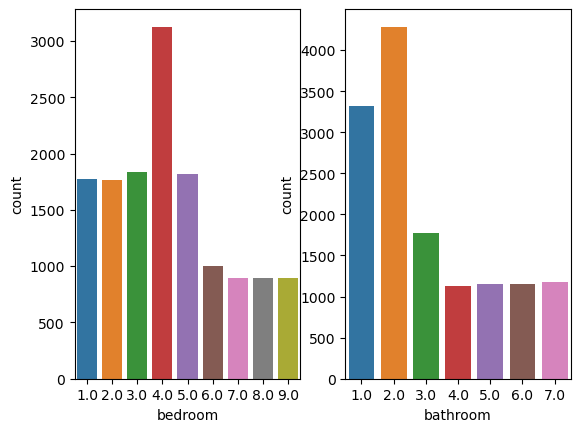

In [69]:
info(df)

In [70]:
var = ['bedroom', 'bathroom', 'price']
df[var].corr()


,bedroom,bathroom,price
bedroom,1.000000,0.191458,0.507549
bathroom,0.191458,1.000000,0.208920
price,0.507549,0.208920,1.000000


<Axes: xlabel='count', ylabel='loc'>

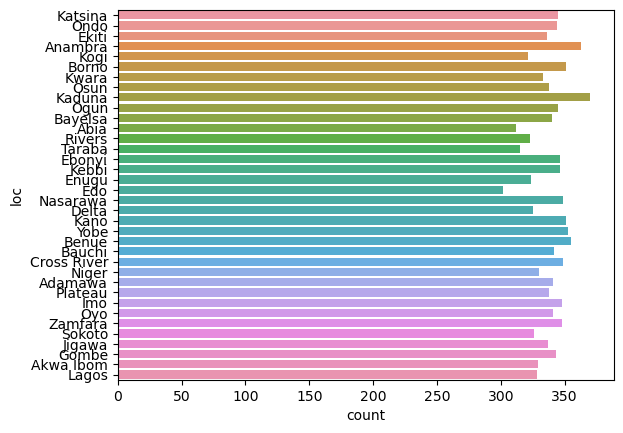

In [71]:
sns.countplot(y = 'loc', data=df)

In [72]:
#Compute average housing prices per state......
place = list(df['loc'].unique())

In [73]:
df['loc'] = df['loc'].fillna(method ='ffill')
df['title'] = df['title'].fillna(method='ffill')

In [74]:
def pps(data):
    loc = list(data['loc'].unique())
    loc_prices = [(j['price'].mean(), j['price'].median()) for j in [data.loc[df['loc']==i] for i in loc]]
    info = {k:v for (k,v) in zip(loc, loc_prices)}
    return info

In [75]:
def counts(data):
    loc = list(data['title'].unique())
    types_prices = [(j['price'].mean(), j['price'].median()) for j in [data.loc[df['title']==i] for i in loc]]
    info = {k:v for (k,v) in zip(loc, types_prices)}
    return info

In [76]:
#counts(df)

In [77]:
#pps(df)

In [78]:
# def std_score(data):
#     std = []
#     non_order = [j[0] for j in [i for i in data.values()]]
#     for i in non_order:
#         z = np.abs((i-np.mean(non_order))/np.std(non_order))
#         std.append(z)
#     return std

In [79]:
# std_score(pps(df))
# x = list(pps(df).keys())
# new_state = {k:v for k,v in zip(x, std_score(pps(df)))}
# df['loc'] = df['loc'].map(new_state)

In [80]:
# std_score(counts(df))
# x = list(counts(df).keys())
# new_state = {k:v for k,v in zip(x, std_score(counts(df)))}
# df['title'] = df['title'].map(new_state)

In [81]:
# def rest(data):
#     std = []
#     x = list(data)
#     for i in x:
#         z = np.abs((i - np.mean(data))/np.std(data))
#         std.append(z)
#     return std

In [82]:
# bathroom = {k:v for k,v in zip(list(df['bathroom']), rest(df['bathroom']))}
# bedroom = {k:v for k,v in zip(list(df['bedroom']), rest(df['bedroom']))}
# parking_space = {k:v for k,v in zip(list(df['parking_space']), rest(df['parking_space']))}

In [83]:
# df['parking_space'] = df['parking_space'].map(parking_space)
# df['bedroom'] = df['bedroom'].map(bedroom)
# df['bathroom'] = df['bathroom'].map(bathroom)

In [84]:
df

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583.0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748.0,Ondo,Apartment,4.0,2.0,4.0,1672416.689
2,9261.0,Ekiti,Apartment,7.0,5.0,4.0,3364799.814
3,2224.0,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300.0,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175.0,Edo,Bungalow,4.0,7.0,3.0,2367927.861
13996,9704.0,Kaduna,Apartment,4.0,7.0,5.0,2228516.471
13997,11190.0,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256.0,Delta,Flat,4.0,6.0,1.0,3348918.718


In [85]:
loc = pd.get_dummies(df['loc'])
title = pd.get_dummies(df['title'])
df = pd.concat([df, loc, title], axis=1)

In [86]:
df

,ID,loc,title,bedroom,bathroom,parking_space,price,Abia,Adamawa,Akwa Ibom,...,Apartment,Bungalow,Cottage,Detached duplex,Flat,Mansion,Penthouse,Semi-detached duplex,Terrace duplex,Townhouse
0,3583.0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2748.0,Ondo,Apartment,4.0,2.0,4.0,1672416.689,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,9261.0,Ekiti,Apartment,7.0,5.0,4.0,3364799.814,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2224.0,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,10300.0,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,6175.0,Edo,Bungalow,4.0,7.0,3.0,2367927.861,0,0,0,...,0,1,0,0,0,0,0,0,0,0
13996,9704.0,Kaduna,Apartment,4.0,7.0,5.0,2228516.471,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13997,11190.0,Plateau,Bungalow,8.0,6.0,5.0,2406812.693,0,0,0,...,0,1,0,0,0,0,0,0,0,0
13998,9256.0,Delta,Flat,4.0,6.0,1.0,3348918.718,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [87]:
x = df.drop(['ID','price', 'loc', 'title'], axis=1)
y = df['price']
             

In [88]:
x = x.values.reshape(-1, 49)

In [89]:
y = y.values.reshape(-1,1)

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

In [92]:
lr = LinearRegression()

In [93]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [94]:
pred = lr.predict(xtest)

In [95]:
get_rmse(pred, ytest)

639822.4116216615

In [96]:
knn = KNeighborsRegressor(n_neighbors =140)

In [97]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=140)

In [98]:
predkn = knn.predict(xtest)

In [99]:
get_rmse(predkn, ytest)

819943.9801830072

In [100]:
dt = DecisionTreeRegressor(max_depth = 3)

In [101]:
dt.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=3)

In [102]:
pred_dt = dt.predict(xtest)

In [103]:
get_rmse(pred_dt, ytest)

804299.9355574625

In [104]:
rf = RandomForestRegressor()

In [105]:
rf.fit(xtrain, ytrain)

C:\Users\kikio\AppData\Local\Temp\ipykernel_7516\9334975.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain, ytrain)


RandomForestRegressor()

In [106]:
predrf = rf.predict(xtest)

In [107]:
get_rmse(predrf, ytest)

694031.8741946294

In [108]:
test = pd.read_csv('Housing_dataset_test.csv')
test

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1
...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4,5,2
5996,2416,Adamawa,Terrace duplex,5,7,1
5997,10195,Oyo,Townhouse,4,1,4
5998,9455,Bauchi,Flat,3,7,5


In [109]:
state = pd.get_dummies(test['loc'])
types = pd.get_dummies(test['title'])
test = pd.concat([test, state, types], axis =1)

In [110]:
x = test.drop(['ID', 'loc', 'title'], axis=1)
ID = test['ID']

In [111]:
price = lr.predict(x)

C:\Users\kikio\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [112]:
prices = price.tolist()
pred = [j[0] for j in [i for i in prices]]

In [113]:
new = pd.Series(pred, name='price')

In [114]:
new

0       2329704.0
1        935888.0
2       1283496.0
3       6441400.0
4       1911088.0
          ...    
5995    1740312.0
5996    2067408.0
5997    2075512.0
5998    1456368.0
5999    3452568.0
Name: price, Length: 6000, dtype: float64

In [115]:
ID = pd.concat([ID, new], axis=1)

In [116]:
ID

,ID,price
0,845,2329704.0
1,1924,935888.0
2,10718,1283496.0
3,12076,6441400.0
4,12254,1911088.0
...,...,...
5995,1594,1740312.0
5996,2416,2067408.0
5997,10195,2075512.0
5998,9455,1456368.0


In [117]:
Solution = ID.to_csv('Solution.csv', sep=',', encoding='utf-8', index=False)